# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

**Fonte de dados**

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data).

**Carregando os dados de Treino e Teste**

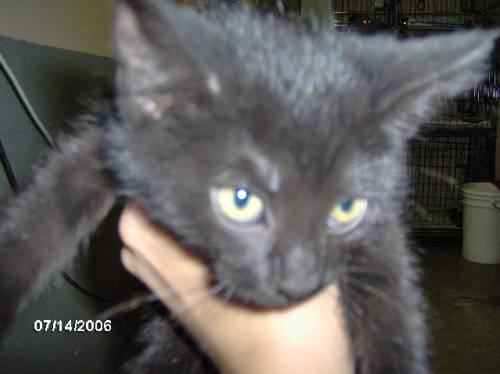

In [1]:
from IPython.display import Image
Image(filename = 'C:/Users/ryanr/Documents/Python/datasets/dogs-vs-cats/test1/test1/302.jpg')

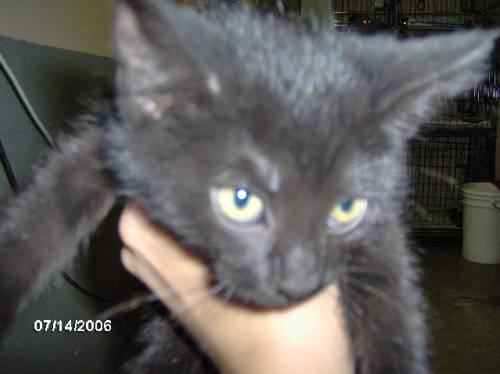

In [2]:
Image(filename = 'C:/Users/ryanr/Documents/Python/datasets/dogs-vs-cats/test1/test1/302.jpg')

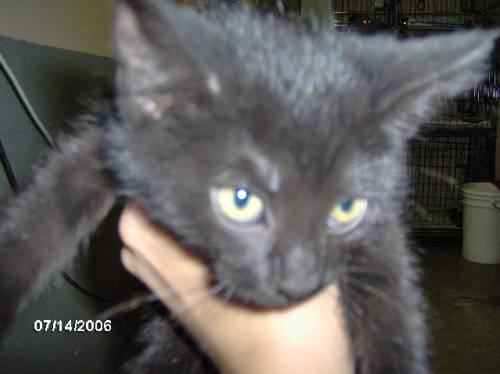

In [3]:
Image(filename = 'C:/Users/ryanr/Documents/Python/datasets/dogs-vs-cats/test1/test1/302.jpg')

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [4]:
import tensorflow as tf

In [5]:
import keras as K

In [6]:
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [7]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [8]:
# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

c:\Users\ryanr\Documents\Python\venvs\dogs-or-cats\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [10]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory(r'C:\Users\ryanr\Documents\Python\datasets\dogs-vs-cats\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 25000 images belonging to 2 classes.


**Treinamento do Modelo**

In [13]:
# Executando o treinamento
# classifier.fit(training_set,
#                steps_per_epoch=781,
#                epochs=25)

# steps_per_epoch é um parâmetro que define quantas fotos cada epoche vai ser treinada. Para um valor pequeno como 5, 
# é de se esperar que o modelo performe negativamente.
# O valor ideal é dado pela razão da quantidade de imagens de treinamento pelo batch_size = 25.000/32 = _____781 steps______
# Dessa maneira, todo o dataset de treinamento será consumido pelo modelo, aumentando a accuracy.

classifier.fit(training_set,
               steps_per_epoch=30,
               epochs=25)

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 275ms/step - accuracy: 0.6560 - loss: 0.6147
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.6292 - loss: 0.6506
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - accuracy: 0.6622 - loss: 0.6186
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - accuracy: 0.6763 - loss: 0.5924
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 242ms/step - accuracy: 0.6604 - loss: 0.6224
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 265ms/step - accuracy: 0.6708 - loss: 0.5964
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 240ms/step - accuracy: 0.6936 - loss: 0.6041
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - accuracy: 0.6902 - loss: 0.5905
Epoch 9/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 244ms/step - accuracy: 0.6669 - loss: 0.6117
Epoch 10/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 265ms/step - accuracy: 0.6603 - loss: 0.6205
Epoch 11/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 231ms/step - accuracy: 0.6808 - loss: 0.5897
Epoch 12/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/ste

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Teste do Modelo**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro.

In [14]:
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}


In [82]:
import os
import numpy as np
from keras.preprocessing import image
from sklearn.metrics import accuracy_score

# Definindo o caminho do diretório de teste
test_dir = r'C:\Users\ryanr\Documents\Python\datasets\dogs-vs-cats\test1\test1'

# Lista de arquivos no diretório de teste
test_files = [f for f in os.listdir(test_dir) if f.endswith('.jpg')]

# Limitar a quantidade de imagens para 5000 ou o total disponível, o que for menor
max_test_images = 5000
test_files = test_files[:max_test_images]

# Variáveis para calcular a precisão
predictions = []
labels = []

# Função para extrair o rótulo verdadeiro do nome do arquivo
def get_true_label(filename):
    if 'dog' in filename:
        return 'Cachorro'
    elif 'cat' in filename:
        return 'Gato'
    else:
        return None  # Se não for possível identificar

# Percorrendo todos os arquivos no diretório de teste
for file in test_files:
    # Carregando a imagem de teste
    img_path = os.path.join(test_dir, file)
    test_image = image.load_img(img_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Fazendo a predição com verbose=0 para suprimir a saída
    result = classifier.predict(test_image, verbose=0)

    # Definindo a predição
    if result[0][0] > 0.5:
        prediction = 'Cachorro'
    else:
        prediction = 'Gato'

    # Salvando a predição e o rótulo verdadeiro
    true_label = get_true_label(file)
    if true_label is not None:
        predictions.append(prediction)
        labels.append(true_label)

# Verificando se há previsões e rótulos válidos
if len(predictions) > 0 and len(labels) > 0:
    accuracy = accuracy_score(labels, predictions)
    print(f"Precisão do modelo: {accuracy * 100:.2f}%")
else:
    print("Nenhuma previsão válida ou rótulo verdadeiro encontrado.")


Nenhuma previsão válida ou rótulo verdadeiro encontrado.


Arquivo: 1.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


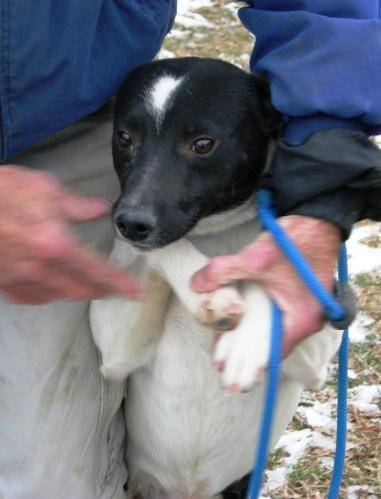

--------------------------------------------------
Arquivo: 10.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


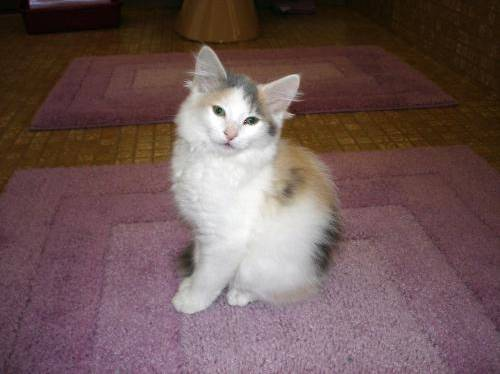

--------------------------------------------------
Arquivo: 100.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


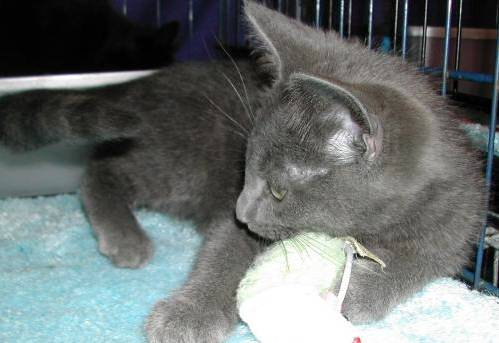

--------------------------------------------------
Arquivo: 1000.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


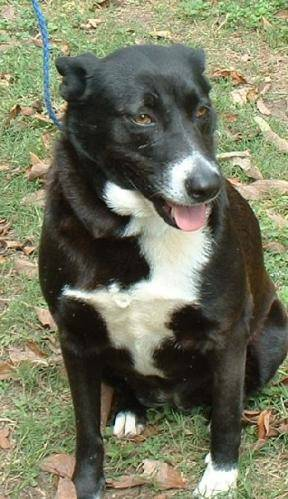

--------------------------------------------------
Arquivo: 10000.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


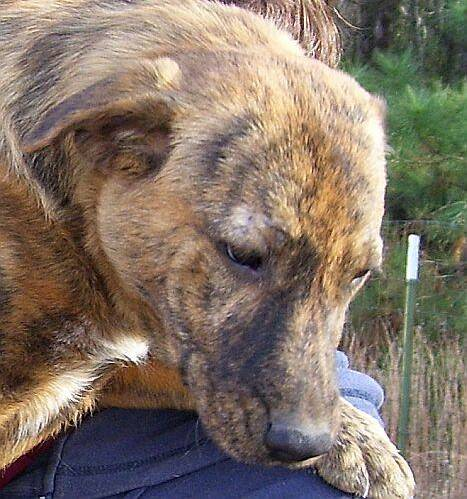

--------------------------------------------------
Arquivo: 10001.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


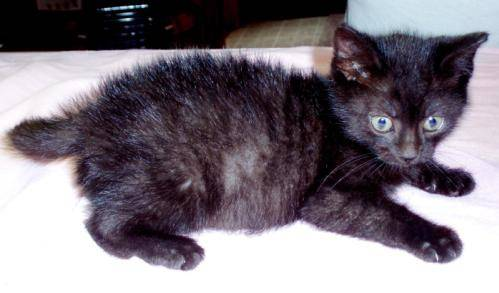

--------------------------------------------------
Arquivo: 10002.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


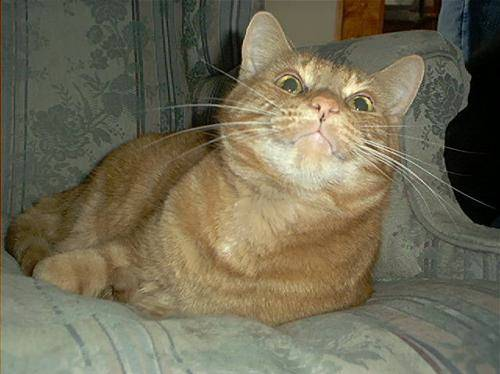

--------------------------------------------------
Arquivo: 10003.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


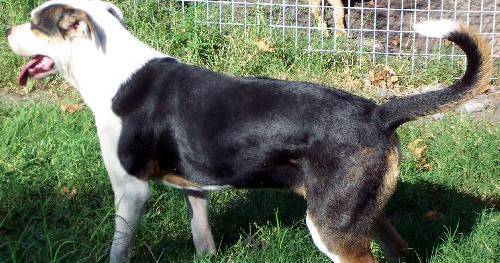

--------------------------------------------------
Arquivo: 10004.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


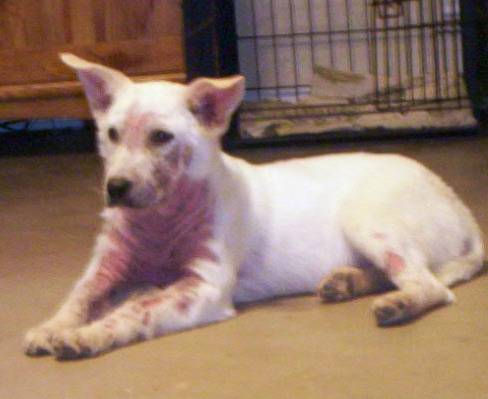

--------------------------------------------------
Arquivo: 10005.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


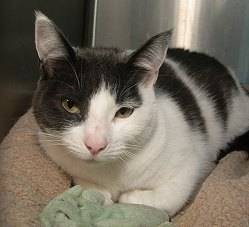

--------------------------------------------------
Arquivo: 10006.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


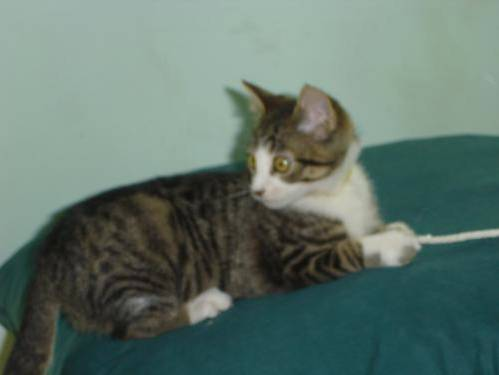

--------------------------------------------------
Arquivo: 10007.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


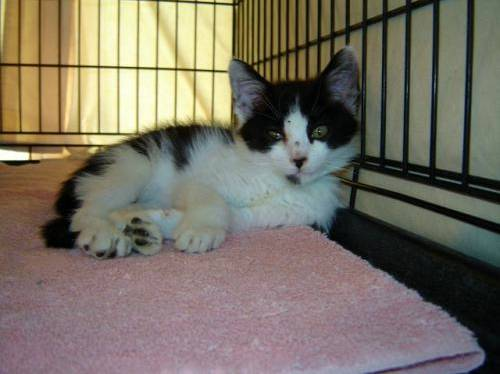

--------------------------------------------------
Arquivo: 10008.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


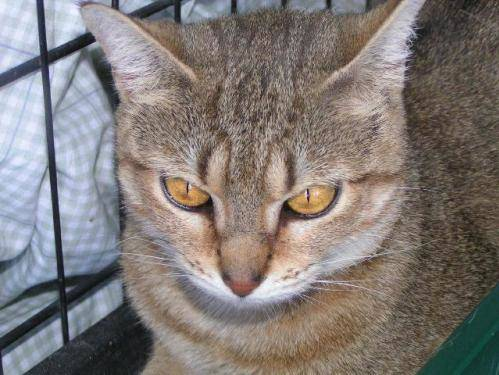

--------------------------------------------------
Arquivo: 10009.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


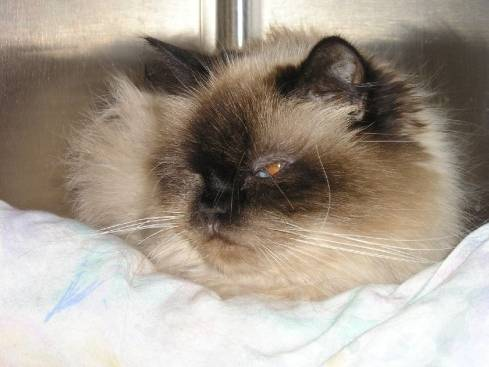

--------------------------------------------------
Arquivo: 1001.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


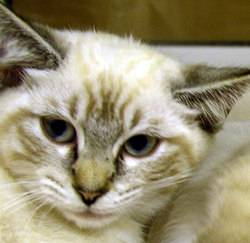

--------------------------------------------------
Arquivo: 10010.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


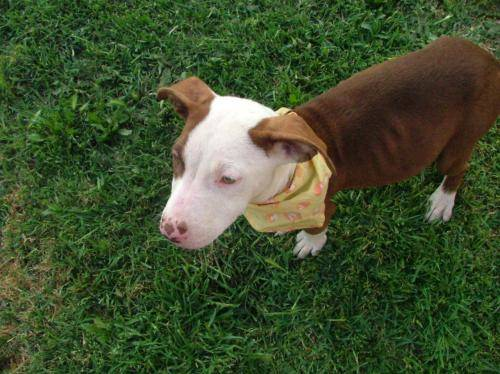

--------------------------------------------------
Arquivo: 10011.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


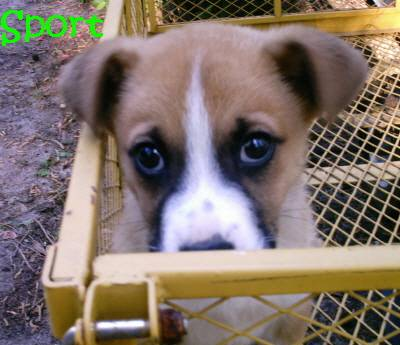

--------------------------------------------------
Arquivo: 10012.jpg
Previsão: Cachorro (Confiança: 97.28%) (Rótulo verdadeiro: None)


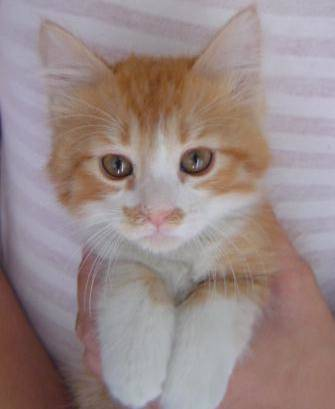

--------------------------------------------------
Arquivo: 10013.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


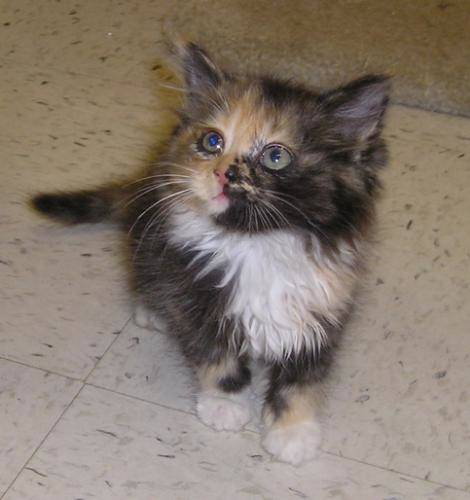

--------------------------------------------------
Arquivo: 10014.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


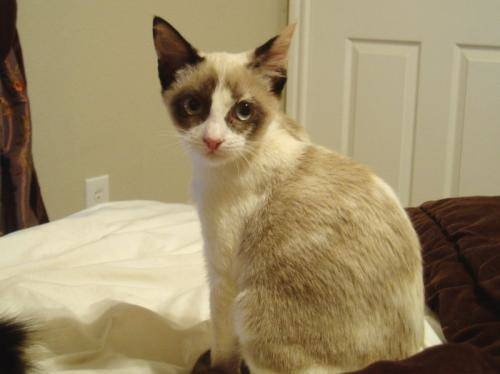

--------------------------------------------------
Arquivo: 10015.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


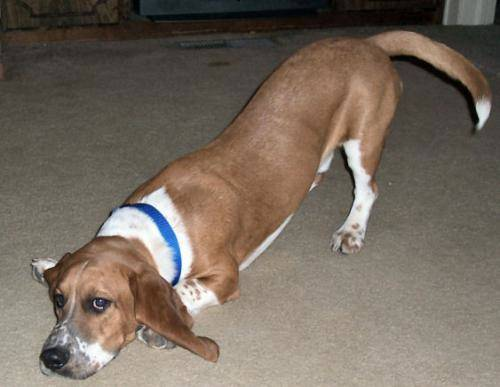

--------------------------------------------------
Arquivo: 10016.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


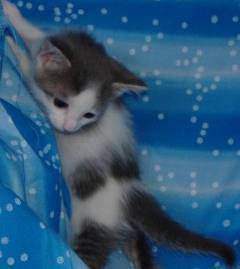

--------------------------------------------------
Arquivo: 10017.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


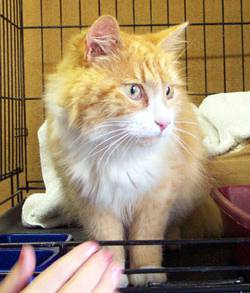

--------------------------------------------------
Arquivo: 10018.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


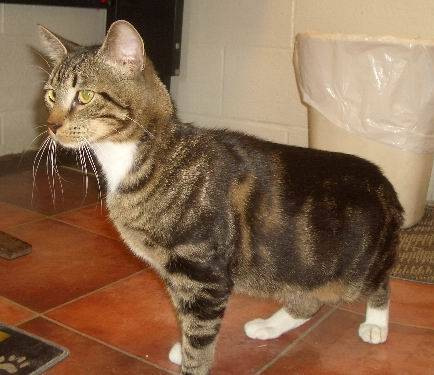

--------------------------------------------------
Arquivo: 10019.jpg
Previsão: Cachorro (Confiança: 73.65%) (Rótulo verdadeiro: None)


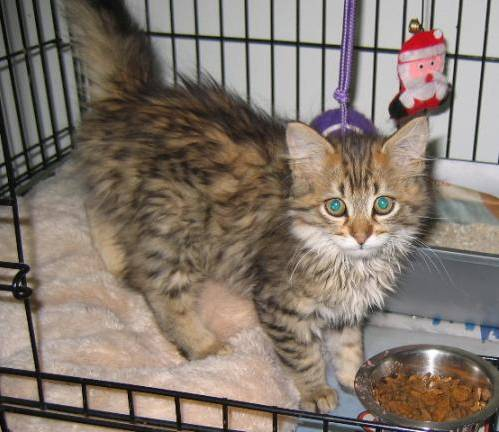

--------------------------------------------------
Arquivo: 1002.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


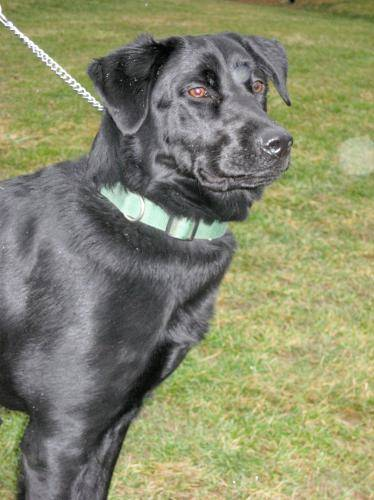

--------------------------------------------------
Arquivo: 10020.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


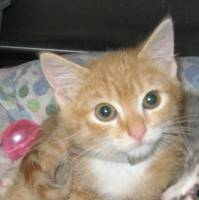

--------------------------------------------------
Arquivo: 10021.jpg
Previsão: Cachorro (Confiança: 89.33%) (Rótulo verdadeiro: None)


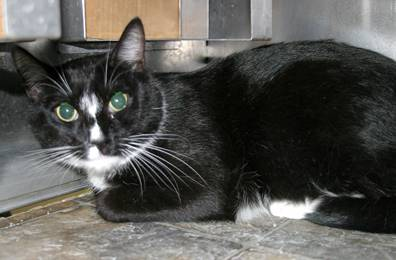

--------------------------------------------------
Arquivo: 10022.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


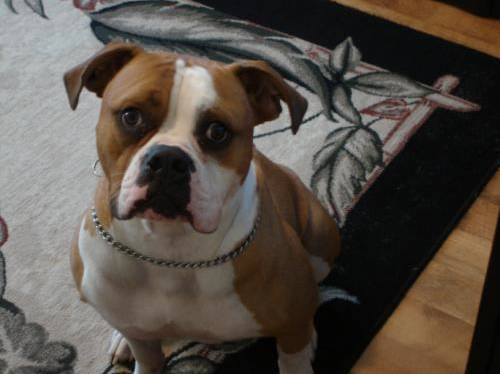

--------------------------------------------------
Arquivo: 10023.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


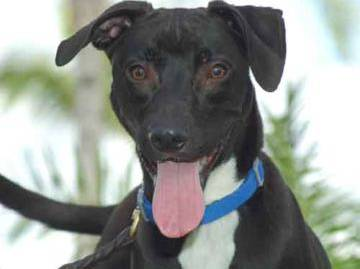

--------------------------------------------------
Arquivo: 10024.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


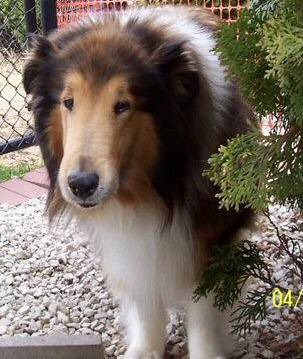

--------------------------------------------------
Arquivo: 10025.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


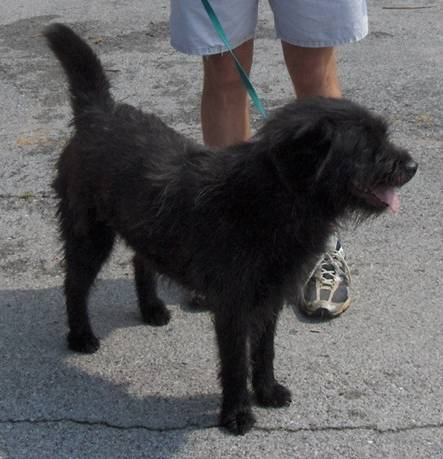

--------------------------------------------------
Arquivo: 10026.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


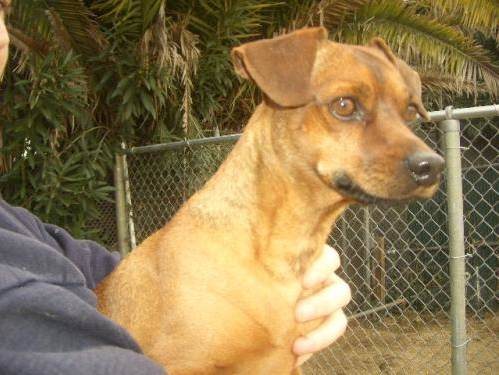

--------------------------------------------------
Arquivo: 10027.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


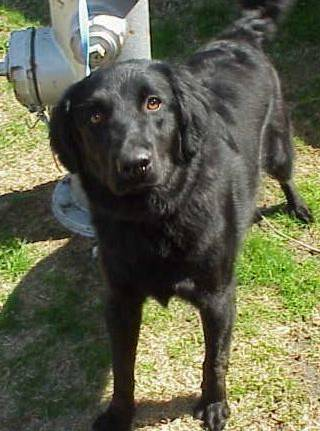

--------------------------------------------------
Arquivo: 10028.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


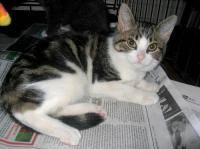

--------------------------------------------------
Arquivo: 10029.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


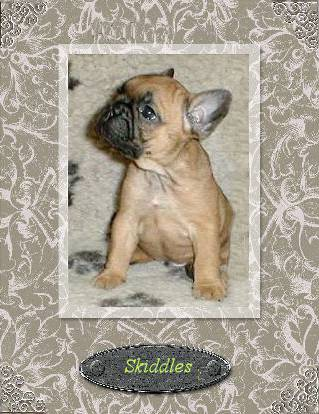

--------------------------------------------------
Arquivo: 1003.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


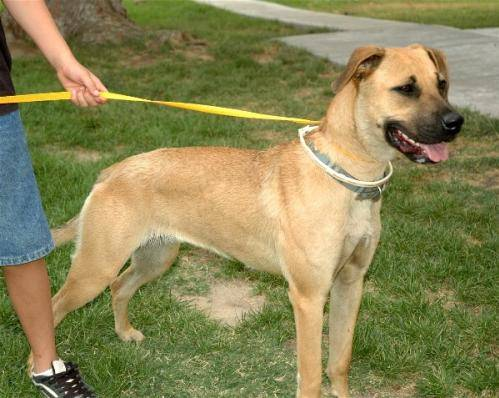

--------------------------------------------------
Arquivo: 10030.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


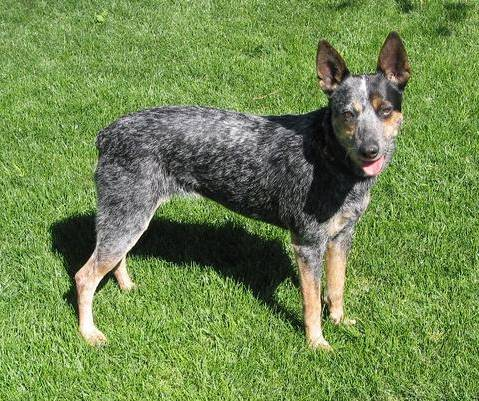

--------------------------------------------------
Arquivo: 10031.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


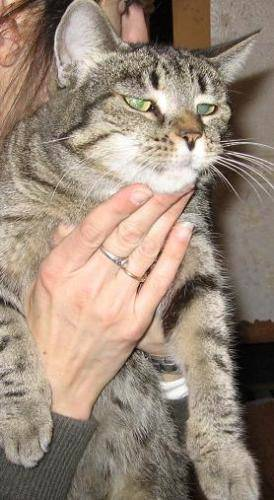

--------------------------------------------------
Arquivo: 10032.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


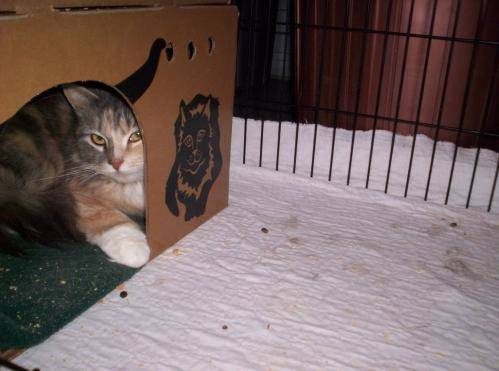

--------------------------------------------------
Arquivo: 10033.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


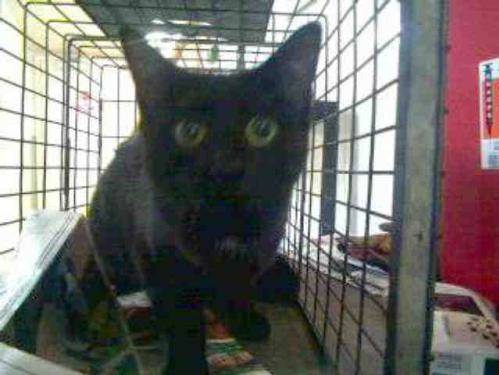

--------------------------------------------------
Arquivo: 10034.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


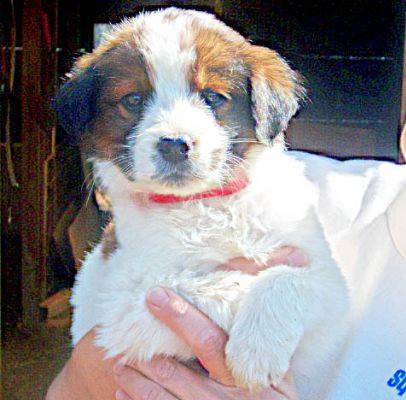

--------------------------------------------------
Arquivo: 10035.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


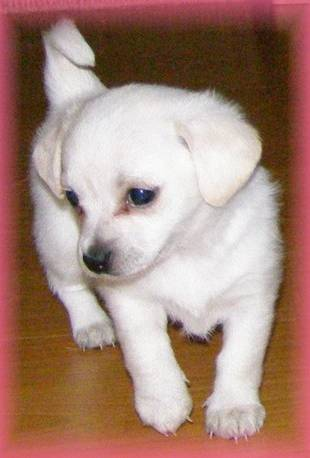

--------------------------------------------------
Arquivo: 10036.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


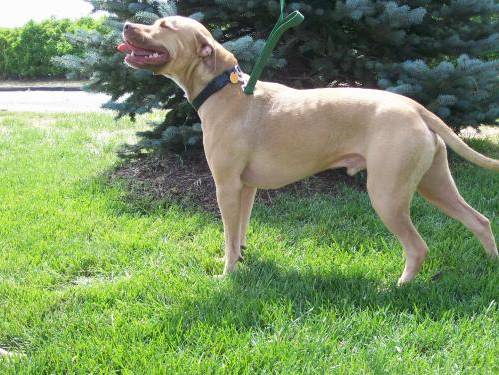

--------------------------------------------------
Arquivo: 10037.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


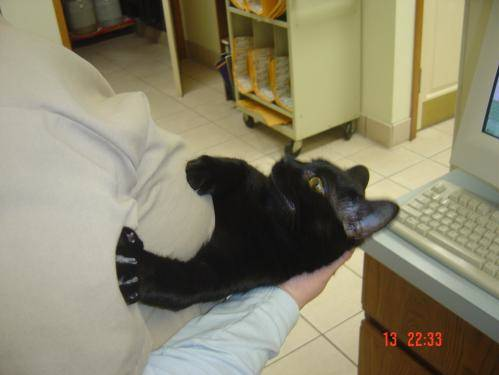

--------------------------------------------------
Arquivo: 10038.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


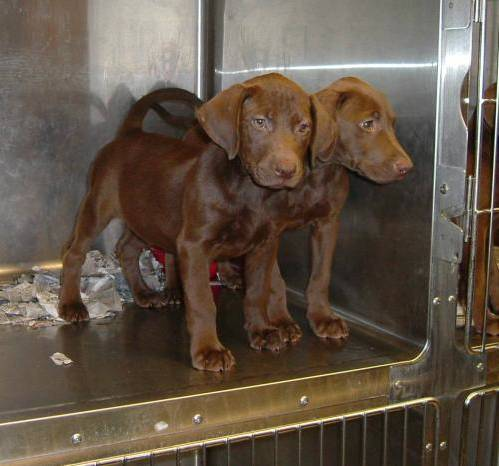

--------------------------------------------------
Arquivo: 10039.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


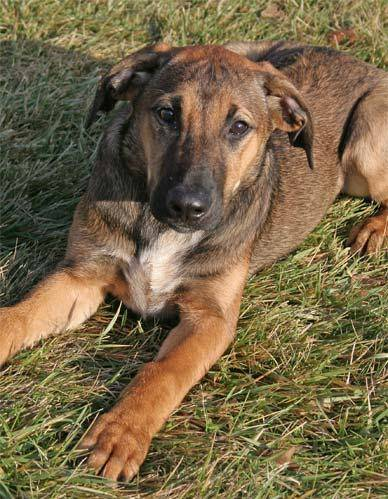

--------------------------------------------------
Arquivo: 1004.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


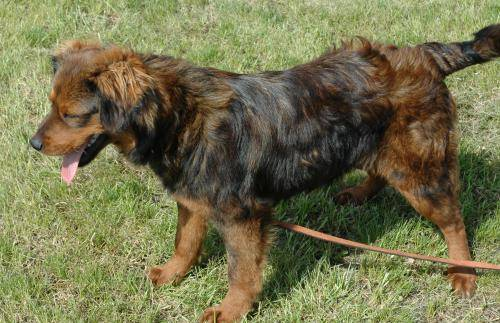

--------------------------------------------------
Arquivo: 10040.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


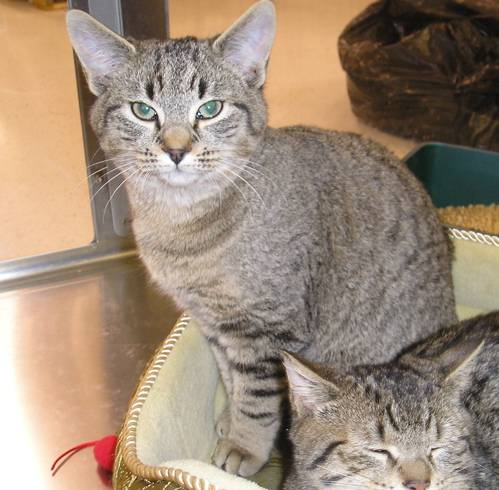

--------------------------------------------------
Arquivo: 10041.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


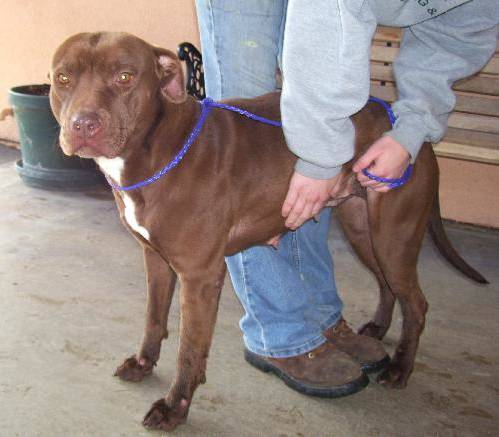

--------------------------------------------------
Arquivo: 10042.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


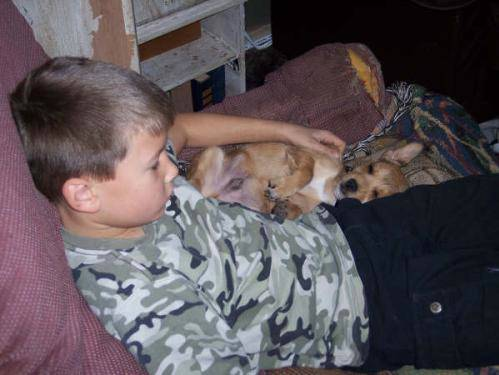

--------------------------------------------------
Arquivo: 10043.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


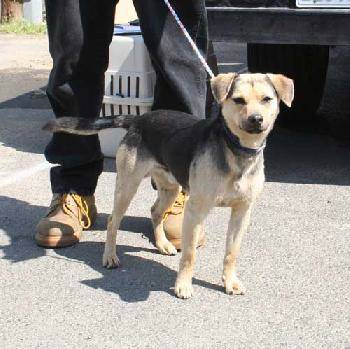

--------------------------------------------------
Arquivo: 10044.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


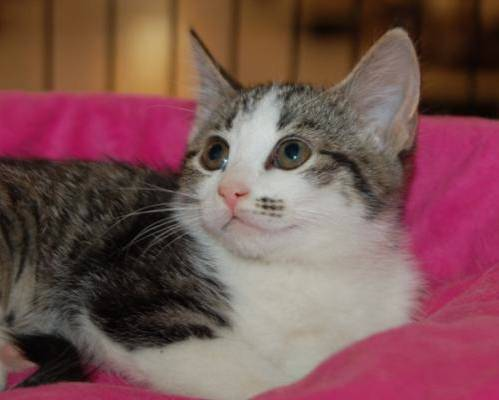

--------------------------------------------------
Arquivo: 10045.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


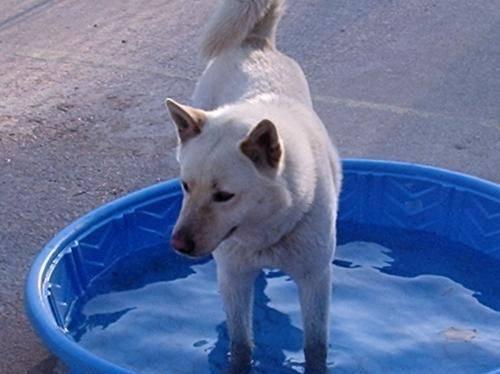

--------------------------------------------------
Arquivo: 10046.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


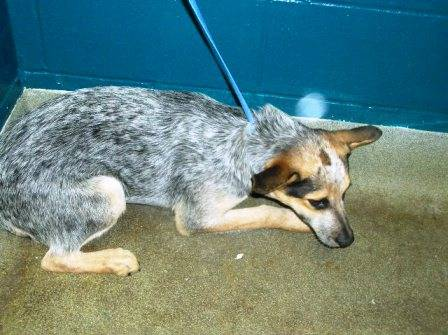

--------------------------------------------------
Arquivo: 10047.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


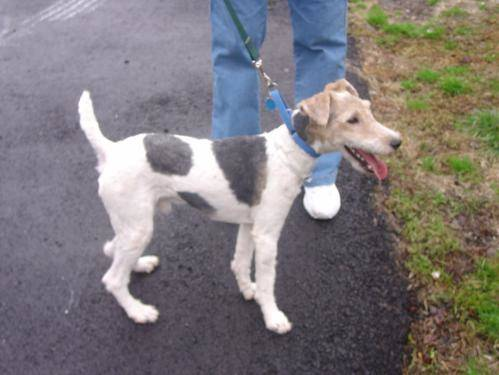

--------------------------------------------------
Arquivo: 10048.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


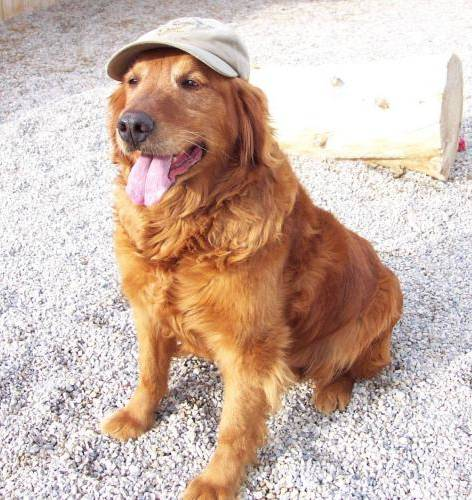

--------------------------------------------------
Arquivo: 10049.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


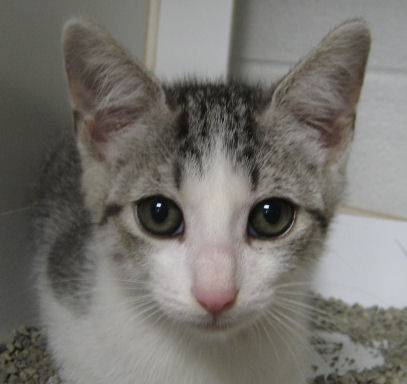

--------------------------------------------------
Arquivo: 1005.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


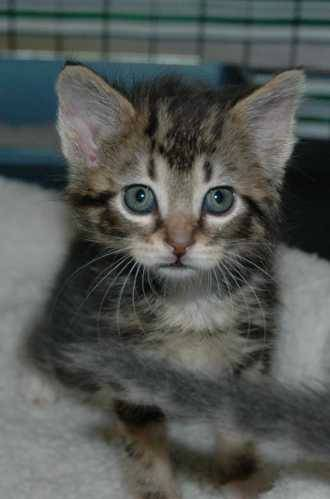

--------------------------------------------------
Arquivo: 10050.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


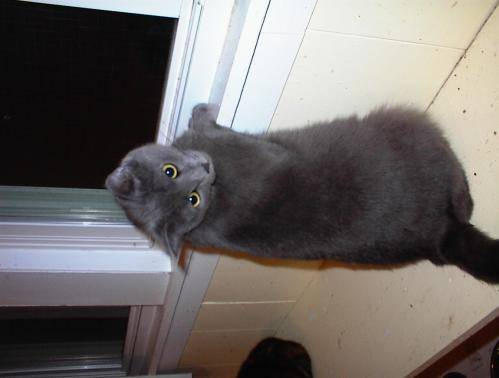

--------------------------------------------------
Arquivo: 10051.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


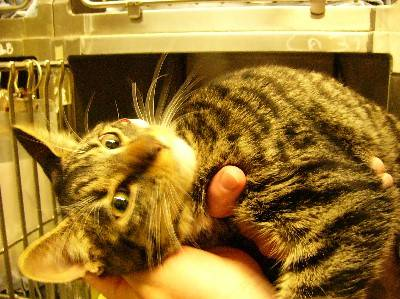

--------------------------------------------------
Arquivo: 10052.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


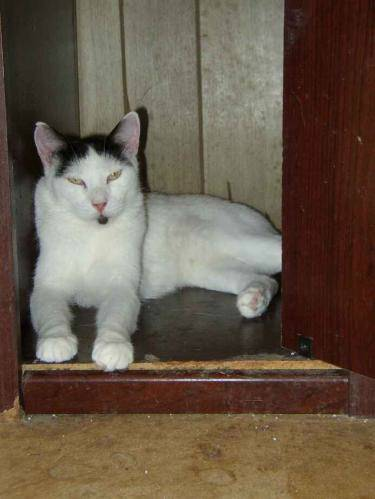

--------------------------------------------------
Arquivo: 10053.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


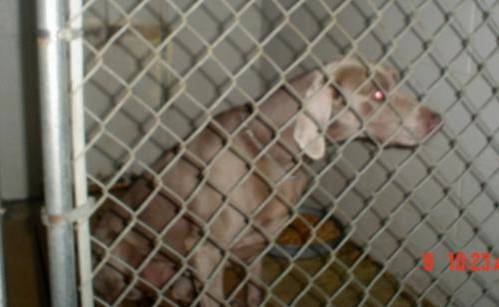

--------------------------------------------------
Arquivo: 10054.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


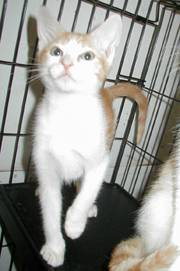

--------------------------------------------------
Arquivo: 10055.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


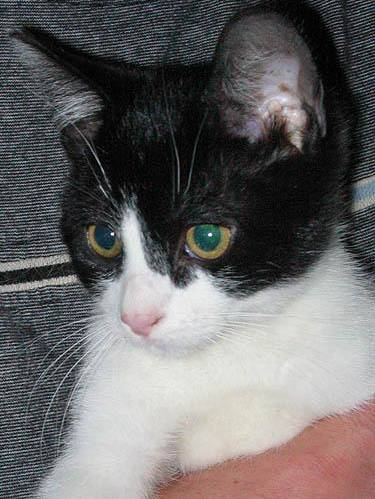

--------------------------------------------------
Arquivo: 10056.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


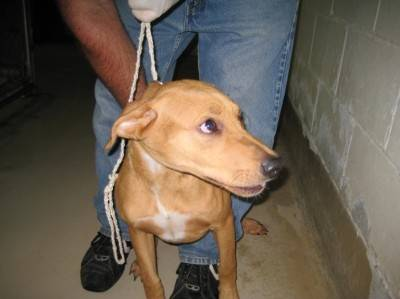

--------------------------------------------------
Arquivo: 10057.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


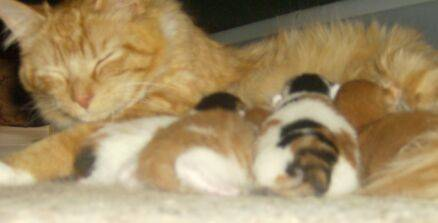

--------------------------------------------------
Arquivo: 10058.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


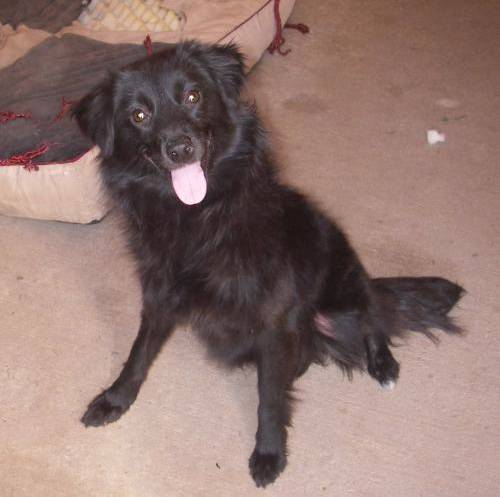

--------------------------------------------------
Arquivo: 10059.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


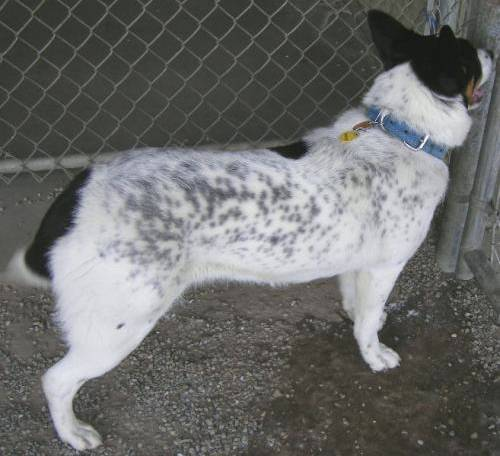

--------------------------------------------------
Arquivo: 1006.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


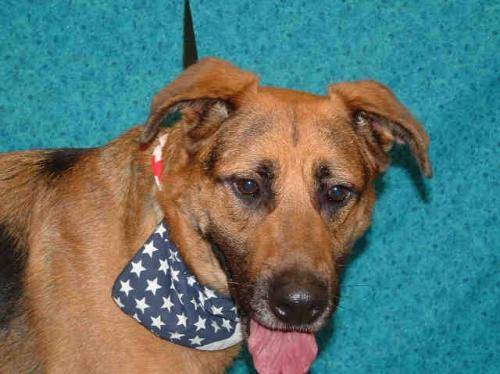

--------------------------------------------------
Arquivo: 10060.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


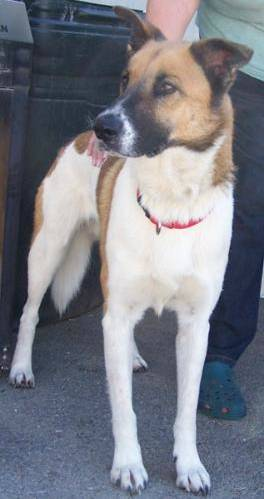

--------------------------------------------------
Arquivo: 10061.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


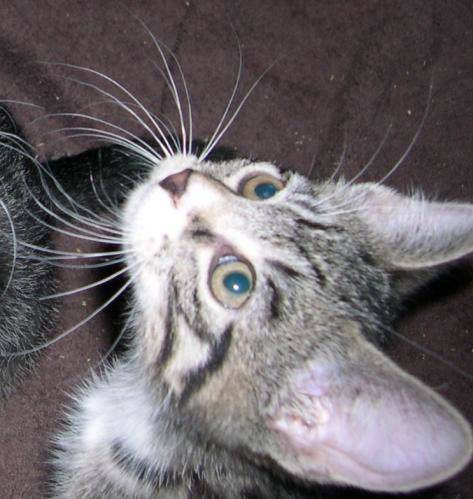

--------------------------------------------------
Arquivo: 10062.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


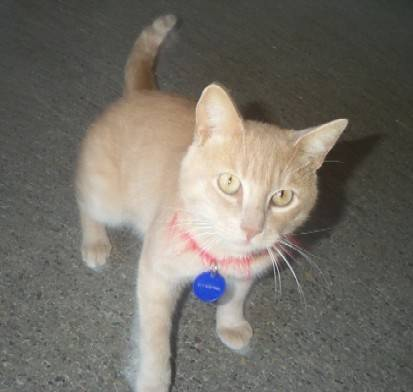

--------------------------------------------------
Arquivo: 10063.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


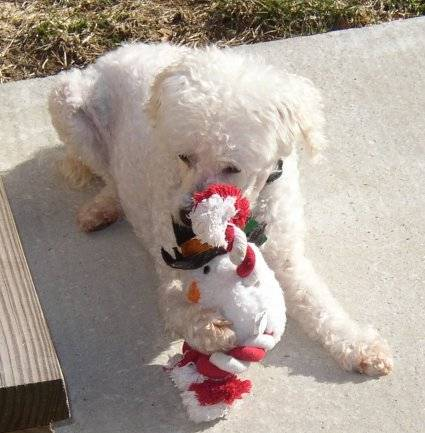

--------------------------------------------------
Arquivo: 10064.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


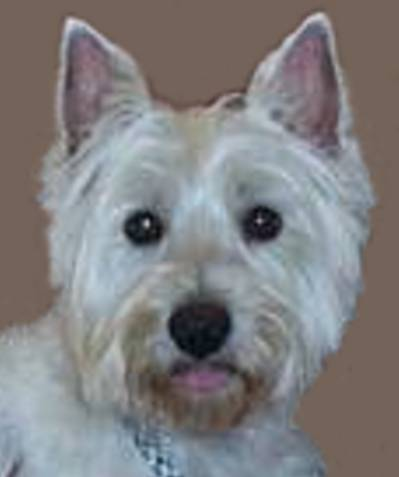

--------------------------------------------------
Arquivo: 10065.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


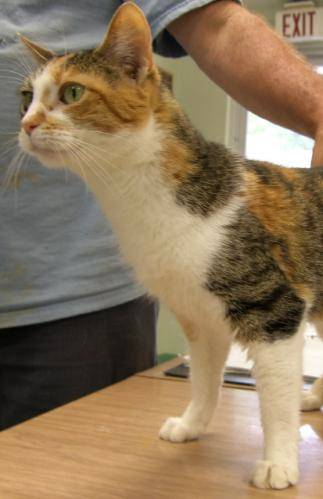

--------------------------------------------------
Arquivo: 10066.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


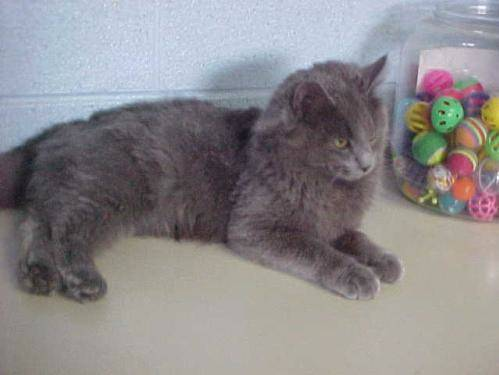

--------------------------------------------------
Arquivo: 10067.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


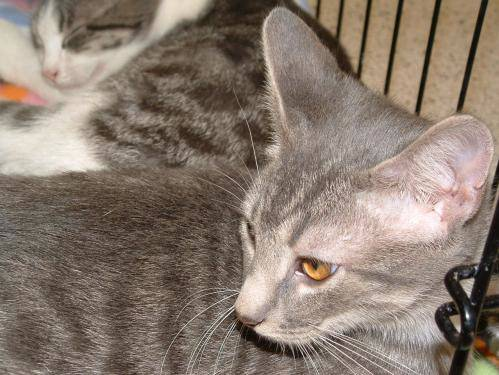

--------------------------------------------------
Arquivo: 10068.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


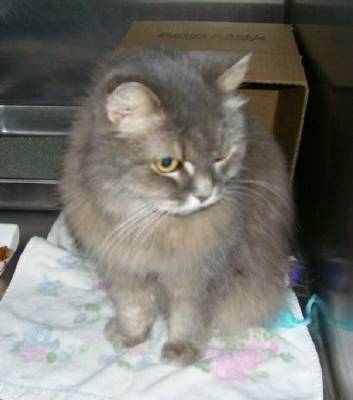

--------------------------------------------------
Arquivo: 10069.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


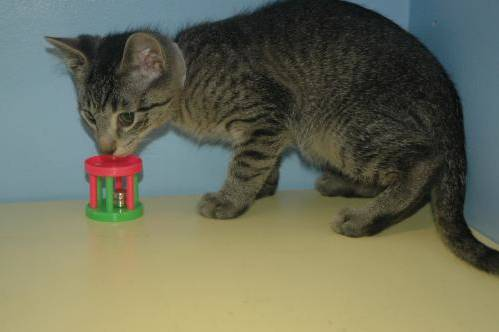

--------------------------------------------------
Arquivo: 1007.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


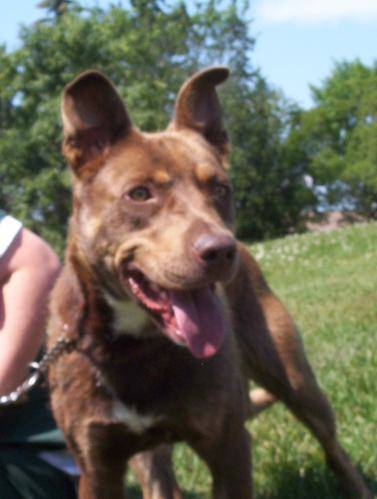

--------------------------------------------------
Arquivo: 10070.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


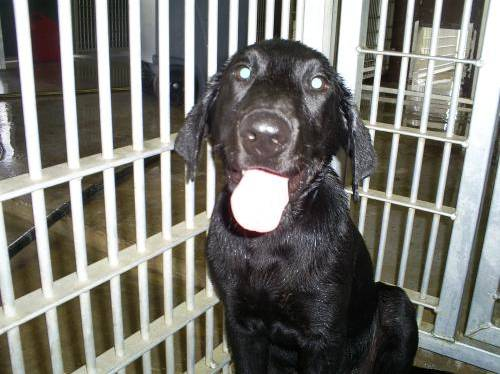

--------------------------------------------------
Arquivo: 10071.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


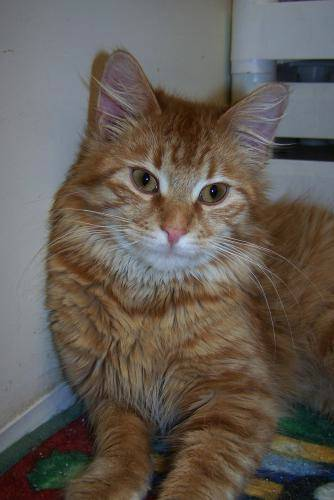

--------------------------------------------------
Arquivo: 10072.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


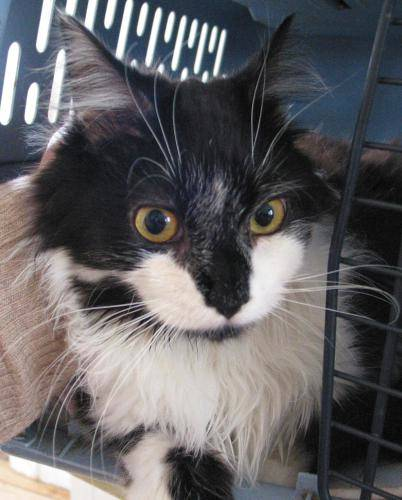

--------------------------------------------------
Arquivo: 10073.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


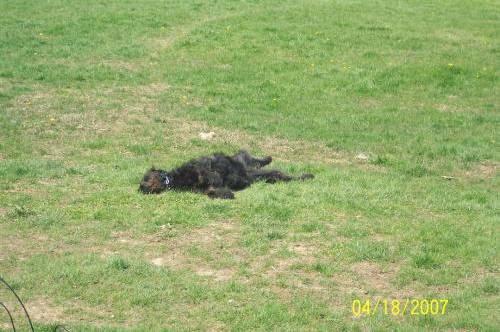

--------------------------------------------------
Arquivo: 10074.jpg
Previsão: Gato (Confiança: 100.0%) (Rótulo verdadeiro: None)


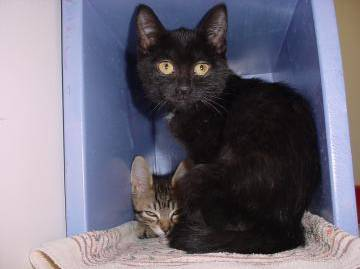

--------------------------------------------------
Arquivo: 10075.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


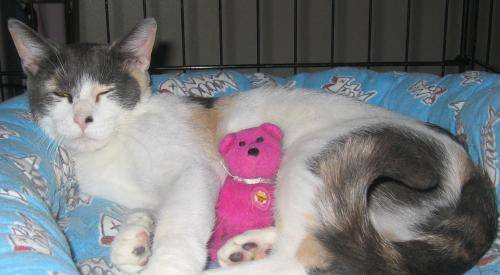

--------------------------------------------------
Arquivo: 10076.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


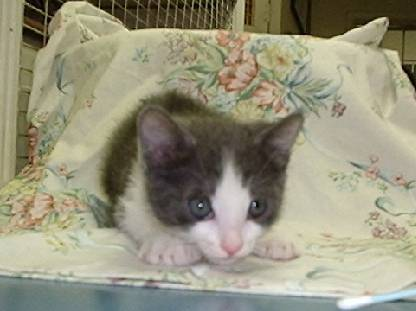

--------------------------------------------------
Arquivo: 10077.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


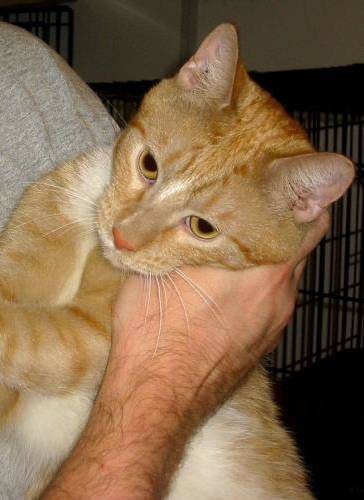

--------------------------------------------------
Arquivo: 10078.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


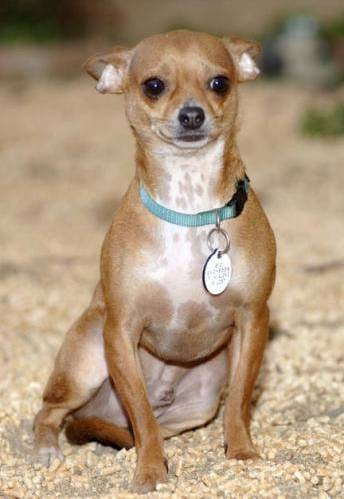

--------------------------------------------------
Arquivo: 10079.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


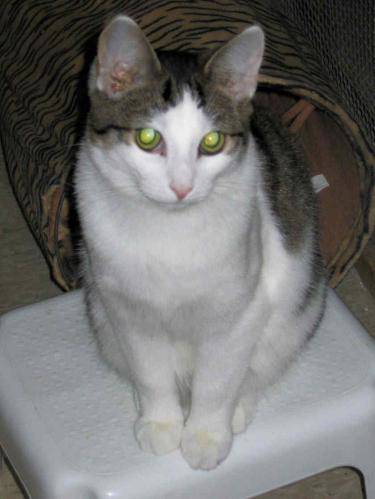

--------------------------------------------------
Arquivo: 1008.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


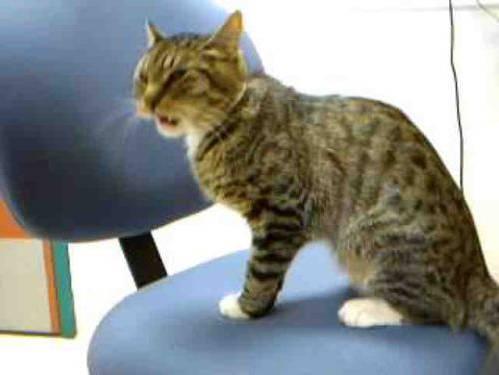

--------------------------------------------------
Arquivo: 10080.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


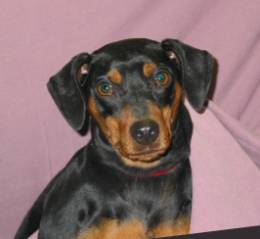

--------------------------------------------------
Arquivo: 10081.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


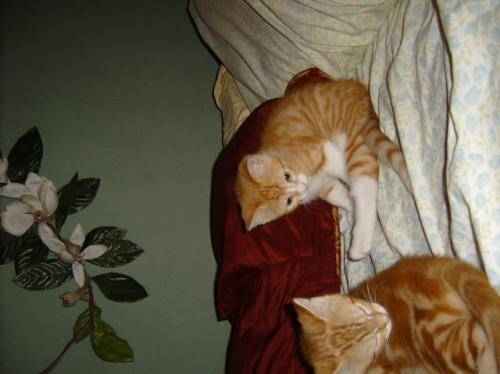

--------------------------------------------------
Arquivo: 10082.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


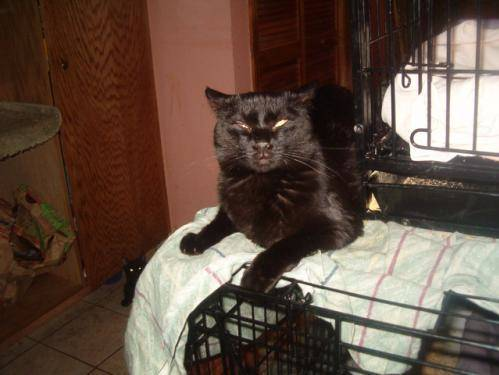

--------------------------------------------------
Arquivo: 10083.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


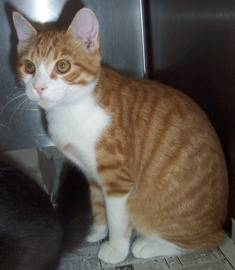

--------------------------------------------------
Arquivo: 10084.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


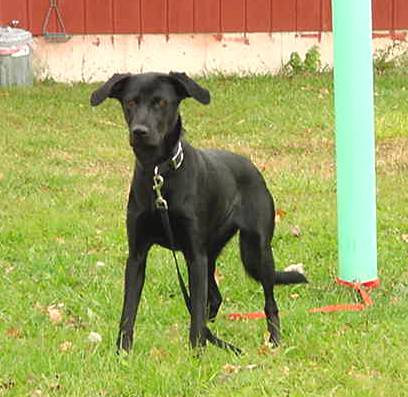

--------------------------------------------------
Arquivo: 10085.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


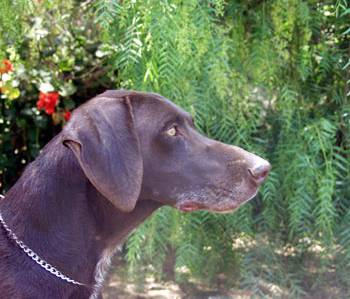

--------------------------------------------------
Arquivo: 10086.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


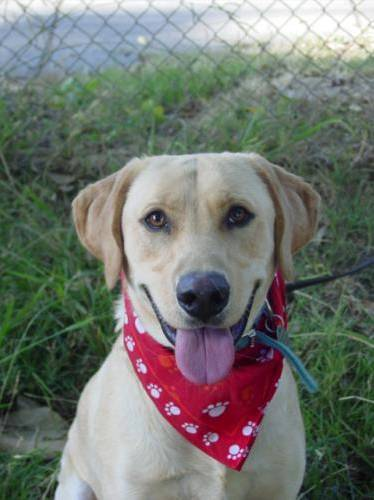

--------------------------------------------------
Arquivo: 10087.jpg
Previsão: Cachorro (Confiança: 100.0%) (Rótulo verdadeiro: None)


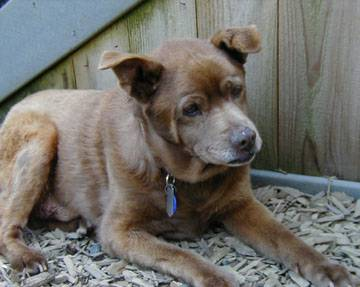

--------------------------------------------------


ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [16]:
import os
import numpy as np
from keras.preprocessing import image
from IPython.display import display, Image
from sklearn.metrics import accuracy_score

# Definindo o caminho do diretório de teste
test_dir = r'C:\Users\ryanr\Documents\Python\datasets\dogs-vs-cats\test1\test1'

# Lista de arquivos no diretório de teste
test_files = [f for f in os.listdir(test_dir) if f.endswith('.jpg')]

# Limitar a lista aos primeiros 1000 arquivos
test_files = test_files[:100]

# Variáveis para calcular a precisão
predictions = []
labels = []

# Função para extrair o rótulo verdadeiro do nome do arquivo
def get_true_label(filename):
    if 'dog' in filename:
        return 'Cachorro'
    elif 'cat' in filename:
        return 'Gato'
    else:
        return None  # Se não for possível identificar

# Percorrendo todos os arquivos no diretório de teste
for file in test_files:
    # Carregando a imagem de teste
    img_path = os.path.join(test_dir, file)
    test_image = image.load_img(img_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Fazendo a predição
    result = classifier.predict(test_image, verbose=0)

    # Definindo a predição e a confiança
    if result[0][0] > 0.5:
        prediction = 'Cachorro'
        confidence = round(result[0][0] * 100, 2)  # Confiança na previsão de 'Cachorro'
    else:
        prediction = 'Gato'
        confidence = round((1 - result[0][0]) * 100, 2)  # Confiança na previsão de 'Gato'

    # Salvando a predição e o rótulo verdadeiro
    true_label = get_true_label(file)
    predictions.append(prediction)
    labels.append(true_label)

    # Exibindo a previsão, a confiança e a imagem correspondente
    print(f"Arquivo: {file}")
    print(f"Previsão: {prediction} (Confiança: {confidence}%) (Rótulo verdadeiro: {true_label})")  # Confiança não está sendo printada
    display(Image(filename=img_path))
    print('-' * 50)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(labels, predictions)
print(f"Precisão do modelo: {accuracy * 100:.2f}%")


####
# Verificar o tamanho das listas
print(f"Tamanho de labels: {len(labels)}")
print(f"Tamanho de predictions: {len(predictions)}")

# Verificar os valores únicos em labels e predictions
print(f"Valores únicos em labels: {set(labels)}")
print(f"Valores únicos em predictions: {set(predictions)}")

# Avaliando o desempenho do modelo (se os tamanhos forem iguais e os valores forem válidos)
if len(labels) == len(predictions):
    accuracy = accuracy_score(labels, predictions)
    print(f"Precisão do modelo: {accuracy * 100:.2f}%")
else:
    print("Erro: Tamanho das listas labels e predictions não correspondem.")


**O modelo recebeu uma imagem que nunca tinha visto antes e com base no que aprendeu durante o treinamento, foi capaz de classificar.**

Convertemos a imagem de teste em um vetor de pixels e apresentamos ao modelo.
O modelo compara o vetor da imagem de teste com seus pesos e então emite a classificação.

**Melhorias adicionais para este modelo:**

*   Aumentar o número de épocas para 25 para uma aprendizagem mais profunda.
*   aumentar o redimensionamento da imagem de 64x64 para 256x256.
*   Aumentar o tamanho do lote de 32 para 64.
*   Alterar a arquitetura da rede incluindo mais uma camada convolucional.
*   Avaliar outras métricas do modelo e ajustar os hiperparâmetros de acordo.
*   Experimentar outros algoritmos de otimização.








Fim! 🔥